### Text Analytics Coursework - MSc in Big Data Analytics
#### July 2021

###### Name: Dilshani Karunaratne
###### IIT ID: 20200321
###### RGU ID: 2016398

### Answer (a)

- In this first section, preprocessing of the dataset is conducted. 
- First of all, libraries like pandas, numpy are imported and then train and test datasets are loaded into two dataframes in pandas. As the datasets didn't include the headers, headers were named at the phase of loading dataset.
- I have checked if there were any missing values
- In the next steps, removing possible extraneous html tags, removing punctuations and tokernizing have been done on the dataframe.
- Finally in this section, total number of words, total number of unique words, total number of sentences, count of suggestions and count of non-suggestion have been printed.

In [1]:
#Importing basic libraries needed
import nltk
from pprint import pprint
import numpy as np
import pandas as pd
import re
import string


In [2]:
df_test = pd.read_csv (r'C:\Users\Dilshani\Documents\TA\coursework\Suggestion-Mining-Datasets-master\test\hotel.csv',header=None,names=["review_num", "text","label"])
df_train = pd.read_csv (r'C:\Users\Dilshani\Documents\TA\coursework\Suggestion-Mining-Datasets-master\train\hotel.csv',header=None,names=["review_num", "text","label"])
df_test.head (10)

review_num  \
0   amsterdam-hotel-189387-review-16.json_4   
1  amsterdam-hotel-189387-review-17.json_11   
2  amsterdam-hotel-189387-review-18.json_13   
3   amsterdam-hotel-189387-review-22.json_9   
4   amsterdam-hotel-189387-review-23.json_7   
5  amsterdam-hotel-189387-review-24.json_10   
6  amsterdam-hotel-189387-review-29.json_19   
7  amsterdam-hotel-189387-review-36.json_29   
8  amsterdam-hotel-189387-review-38.json_15   
9  amsterdam-hotel-229151-review-16.json_14   

                                                text  label  
0  For a lovely breakfast, turn left out of the f...      1  
1  If you catch them right your in a 4 star hotel...      1  
2  and travelers should avoid it if they are look...      1  
3  On thing I liked was just a block away was an ...      1  
4  Might be a good place for tourists, but try an...      1  
5  However, people should know that the rating in...      1  
6  If you want something a bit different I am sur...      1  
7  the cafe off the main lobby is expensive for c...      1  
8  Also, the hotel would be advised to forget the...      1  
9  If you can stay on the TOP floor, I highly rec...      1

In [3]:
df_train.shape

(7534, 3)

In [4]:
df_train.head ()

review_num  \
0  berlin-hotel-190599-review-1.json_0   
1  berlin-hotel-190599-review-1.json_1   
2  berlin-hotel-190599-review-1.json_2   
3  berlin-hotel-190599-review-1.json_3   
4  berlin-hotel-190599-review-1.json_4   

                                                text  label  
0              This hotel was very modern and sleek.      0  
1     Beautiful, well-laid out, albeiit small rooms.      0  
2  Fantastic breakfast with an incredible selecti...      0  
3                       the staff were uber-helpful.      0  
4          Great location in front of a u-bahn stop.      0

In [5]:
df_train[['review_num','sub_rev']] = df_train['review_num'].str.split('.',expand=True)

In [6]:
df_train= df_train.drop(['sub_rev'], axis = 1)

In [7]:
df_train.head(10)

review_num  \
0  berlin-hotel-190599-review-1   
1  berlin-hotel-190599-review-1   
2  berlin-hotel-190599-review-1   
3  berlin-hotel-190599-review-1   
4  berlin-hotel-190599-review-1   
5  berlin-hotel-190599-review-2   
6  berlin-hotel-190599-review-2   
7  berlin-hotel-190599-review-2   
8  berlin-hotel-190599-review-2   
9  berlin-hotel-190599-review-2   

                                                text  label  
0              This hotel was very modern and sleek.      0  
1     Beautiful, well-laid out, albeiit small rooms.      0  
2  Fantastic breakfast with an incredible selecti...      0  
3                       the staff were uber-helpful.      0  
4          Great location in front of a u-bahn stop.      0  
5  Our first trip to Berlin, so we were unfamilia...      0  
6   But we were drawn to the design of the Art'otel.      0  
7        Yes, the public spaces are nicely designed,      0  
8                                  as are the rooms.      0  
9   But the rooms are small and not very functional.      0

In [8]:
df_train.tail(10)

review_num                                               text  label
7524  478252:955  I was travelling with my husband and step son ...      0
7525  478252:955  We wanted to upgrade so we were closer to the ...      0
7526  478252:955  Pools- Three large pools that everyone can use...      0
7527  478252:955  The water is warm but fairly murky....not near...      0
7528  478252:955  Trips: Only took one trip...Saona Island...Thi...      0
7529  478252:955  Beware as in the trip info it says that you ca...      1
7530  478252:955  For the elderly or overweight it is a task to ...      0
7531  478252:955                The trip was definately worthwhile.      0
7532  478252:955                                   Just a few tips.      0
7533  478252:955  you dont need a blow dryer one is provided, if...      1

In [9]:
df_train.isnull().values.any()

False

In [10]:
df_test.isnull().values.any()

False

In [11]:
#Removing possible extraneous html tags

def removeHtml(text_df):
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text_df)

df_train['review_num'] = df_train['review_num'].apply(lambda x: removeHtml(x))
df_train['text'] = df_train['text'].apply(lambda x: removeHtml(x))
df_test['review_num'] = df_test['review_num'].apply(lambda x: removeHtml(x))
df_test['text'] = df_test['text'].apply(lambda x: removeHtml(x))
df_train.head(5)

review_num  \
0  berlin-hotel-190599-review-1   
1  berlin-hotel-190599-review-1   
2  berlin-hotel-190599-review-1   
3  berlin-hotel-190599-review-1   
4  berlin-hotel-190599-review-1   

                                                text  label  
0              This hotel was very modern and sleek.      0  
1     Beautiful, well-laid out, albeiit small rooms.      0  
2  Fantastic breakfast with an incredible selecti...      0  
3                       the staff were uber-helpful.      0  
4          Great location in front of a u-bahn stop.      0

In [12]:
#Removing punctuations from the text

import string
import re


def removePun(text_df):
    text_df  = "".join([char for char in text_df if char not in string.punctuation])
    text_df = re.sub('[0-9]+', '', text_df)
    return text_df

df_train['text'] = df_train['text'].apply(lambda x: removePun(x))
df_test['text'] = df_test['text'].apply(lambda x: removePun(x))


In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [14]:
# Tokanize the text
def tokenize(text_df):
    text_df = re.split('\W+', text_df)
    return text_df

df_train['tokernized_text'] = df_train['text'].apply(lambda x: tokenize(x.lower()))


df_train.head()

review_num  \
0  berlin-hotel-190599-review-1   
1  berlin-hotel-190599-review-1   
2  berlin-hotel-190599-review-1   
3  berlin-hotel-190599-review-1   
4  berlin-hotel-190599-review-1   

                                                text  label  \
0               This hotel was very modern and sleek      0   
1         Beautiful welllaid out albeiit small rooms      0   
2  Fantastic breakfast with an incredible selecti...      0   
3                         the staff were uberhelpful      0   
4            Great location in front of a ubahn stop      0   

                                     tokernized_text  
0       [this, hotel, was, very, modern, and, sleek]  
1  [beautiful, welllaid, out, albeiit, small, rooms]  
2  [fantastic, breakfast, with, an, incredible, s...  
3                    [the, staff, were, uberhelpful]  
4   [great, location, in, front, of, a, ubahn, stop]

In [15]:
df_train.shape

(7534, 4)

In [16]:
df_test['tokernized_text'] = df_test['text'].apply(lambda x: tokenize(x.lower()))

df_test.head()

review_num  \
0   amsterdam-hotel-189387-review-16.json_4   
1  amsterdam-hotel-189387-review-17.json_11   
2  amsterdam-hotel-189387-review-18.json_13   
3   amsterdam-hotel-189387-review-22.json_9   
4   amsterdam-hotel-189387-review-23.json_7   

                                                text  label  \
0  For a lovely breakfast turn left out of the fr...      1   
1  If you catch them right your in a  star hotel ...      1   
2  and travelers should avoid it if they are look...      1   
3  On thing I liked was just a block away was an ...      1   
4  Might be a good place for tourists but try ano...      1   

                                     tokernized_text  
0  [for, a, lovely, breakfast, turn, left, out, o...  
1  [if, you, catch, them, right, your, in, a, sta...  
2  [and, travelers, should, avoid, it, if, they, ...  
3  [on, thing, i, liked, was, just, a, block, awa...  
4  [might, be, a, good, place, for, tourists, but...

In [17]:
df_test.shape

(808, 4)

In [18]:
# Get the words count
def getWordsCount(data_set):
  index_no = 0
  word_count = 0
  
  while index_no < len(data_set):
    length = len(data_set[index_no])    
    word_count += length
    index_no += 1

  return word_count


# Get the all words count
def getWords(list1):
  index_no = 0
  full_words_set = []
  while index_no < len(list1):
    i = 0
    while i < len(list1[index_no]):
      full_words_set.append(list1[index_no][i])
      i += 1
    index_no += 1
  return full_words_set  

# Get the unique words c
def getUnique(uni_list): 
  list_set = set(uni_list) # insert the list to the set
  unique_list = (list(list_set)) # convert the set to the list
  unique_count = len(unique_list)
  return unique_count

def getUniqueList(uni_list): 
  list_set = set(uni_list) # insert the list to the set
  unique_list = (list(list_set)) # convert the set to the list
  return unique_list


In [19]:
get_count_words_train = getWordsCount(df_train['tokernized_text'])
get_unique_train = getUnique(getWords(df_train['tokernized_text']))

print(f'Total word count for training dataset is {get_count_words_train}')
print(f'Total unique word count for training datase is {get_unique_train}')

Total word count for training dataset is 105242
Total unique word count for training datase is 7690


In [20]:
suggestion_count = (df_train['label'].values == 1).astype(int).sum()
non_suggestion_count = (df_train['label'].values == 0).astype(int).sum()
print("Total sentences in training dataset: " + str(df_train.shape[0]))
print("Total suggestions in training dataset: " + str(suggestion_count))
print("Total non_suggestions in training dataset: " + str(non_suggestion_count))

Total sentences in training dataset: 7534
Total suggestions in training dataset: 448
Total non_suggestions in training dataset: 7086


In [21]:
get_count_words_test = getWordsCount(df_test['tokernized_text'])
get_unique_test = getUnique(getWords(df_test['tokernized_text']))

print(f'Total word count for testing dataset is {get_count_words_test}')
print(f'Total unique word count for testing datase is {get_unique_test}')

Total word count for testing dataset is 13029
Total unique word count for testing datase is 2351


In [22]:
suggestion_count_test = (df_test['label'].values == 1).astype(int).sum()
non_suggestion_count_test = (df_test['label'].values == 0).astype(int).sum()
print("Total sentences in testing dataset : " + str(df_test.shape[0]))
print("Total suggestions in testing dataset: " + str(suggestion_count_test))
print("Total non_suggestions in testing dataset: " + str(non_suggestion_count_test))

Total sentences in testing dataset : 808
Total suggestions in testing dataset: 404
Total non_suggestions in testing dataset: 404


#### My observations

- There were no missing values in both datasets
- Train dataset is nearly 7 times large as the test dataset
- Train dataset has many non-suggestions where test dataset has 1:1 amount of suggestions and non-suggestions

### Answer (b)

- The main aim of this section is to reduce 'noise'
- Removing stopwords has been done in order to gain more importance in the dataset by removing noise
- Both lemmatizing and stemming both have been performed. Stem might not be an actual word whereas, lemma is an actual language word. Therefore, more recommended approach is to perform lemmatizing.
- Total words count, total unique count, maximum and minimum document sized have been calculated in this section

In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [24]:
#Removing stopwords

stop_words = set(stopwords.words('english'))
wordnet = WordNetLemmatizer()
        
def removeStopwords(text_dataframe):
    text_dataframe = [wordnet.lemmatize(word) for word in text_dataframe if word not in stop_words]
    return text_dataframe

df_train['without_stopwords_text'] = df_train['tokernized_text'].apply(lambda x: removeStopwords(x))

df_train.head(10)


review_num  \
0  berlin-hotel-190599-review-1   
1  berlin-hotel-190599-review-1   
2  berlin-hotel-190599-review-1   
3  berlin-hotel-190599-review-1   
4  berlin-hotel-190599-review-1   
5  berlin-hotel-190599-review-2   
6  berlin-hotel-190599-review-2   
7  berlin-hotel-190599-review-2   
8  berlin-hotel-190599-review-2   
9  berlin-hotel-190599-review-2   

                                                text  label  \
0               This hotel was very modern and sleek      0   
1         Beautiful welllaid out albeiit small rooms      0   
2  Fantastic breakfast with an incredible selecti...      0   
3                         the staff were uberhelpful      0   
4            Great location in front of a ubahn stop      0   
5  Our first trip to Berlin so we were unfamiliar...      0   
6     But we were drawn to the design of the Artotel      0   
7          Yes the public spaces are nicely designed      0   
8                                   as are the rooms      0   
9    But the rooms are small and not very functional      0   

                                     tokernized_text  \
0       [this, hotel, was, very, modern, and, sleek]   
1  [beautiful, welllaid, out, albeiit, small, rooms]   
2  [fantastic, breakfast, with, an, incredible, s...   
3                    [the, staff, were, uberhelpful]   
4   [great, location, in, front, of, a, ubahn, stop]   
5  [our, first, trip, to, berlin, so, we, were, u...   
6  [but, we, were, drawn, to, the, design, of, th...   
7  [yes, the, public, spaces, are, nicely, designed]   
8                              [as, are, the, rooms]   
9  [but, the, rooms, are, small, and, not, very, ...   

                              without_stopwords_text  
0                             [hotel, modern, sleek]  
1        [beautiful, welllaid, albeiit, small, room]  
2  [fantastic, breakfast, incredible, selection, ...  
3                               [staff, uberhelpful]  
4              [great, location, front, ubahn, stop]  
5    [first, trip, berlin, unfamiliar, city, layout]  
6                           [drawn, design, artotel]  
7             [yes, public, space, nicely, designed]  
8                                             [room]  
9                          [room, small, functional]

In [25]:
df_train.shape

(7534, 5)

In [26]:
get_count_words_train = getWordsCount(df_train['without_stopwords_text'])
get_unique_train = getUnique(getWords(df_train['without_stopwords_text']))

print(f'Total word count of training dataset is {get_count_words_train}')
print(f'Total unique word count of training datase is {get_unique_train}')

Total word count of training dataset is 53072
Total unique word count of training datase is 6873


In [27]:
# Get the words count
def getWordsCount(doc_size):
  index_no = 0
  document_size = []
  
  while index_no < len(doc_size):
    length = len(doc_size[index_no])
    document_size.append(length)
    index_no += 1

  print(f'Maximum document size is {max(document_size)}')
  print(f'Minimum document size is {min(document_size)}')
  return document_size


In [28]:
get_document_size_train = getWordsCount(df_train['without_stopwords_text'])

Maximum document size is 41
Minimum document size is 0


In [29]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmy = WordNetLemmatizer()

def StemWords(text):
    
    text_split = text.split(' ')
    stem_text = ''
    for word in text_split:
        stem_text += stemmer.stem(word) + ' '
        
    return stem_text


def LemmWords(text):
    
    text_split = text.split(' ')
    lemm_text = ''
    for word in text_split:
        lemm_text += lemmy.lemmatize(word, pos='v') + ' '
        
    text_split = lemm_text.split(' ')
    lemmed_text = ''
    for word in text_split:
        lemmed_text += lemmy.lemmatize(word, pos='a') + ' '
        
    return lemmed_text

In [30]:
df_train['stemmed_text'] = df_train['text'].apply(StemWords)
df_train['lemmed_text'] = df_train['text'].apply(LemmWords)

df_test['stemmed_text'] = df_test['text'].apply(StemWords)
df_test['lemmed_text'] = df_test['text'].apply(LemmWords)

In [31]:
row_index = 752
print("The original text in the review:",'\n',df_train['text'].iloc[row_index],'\n')
print("Review after lemmatizing:",'\n',df_train['lemmed_text'].iloc[row_index],'\n')

The original text in the review: 
 The staff was friendly and completely bilingual 

Review after lemmatizing: 
 The staff be friendly and completely bilingual   



In [32]:
row_index = 752
print("The original text in the review:",'\n',df_train['text'].iloc[row_index],'\n')
print("Review after stemming:",'\n',df_train['stemmed_text'].iloc[row_index],'\n')

The original text in the review: 
 The staff was friendly and completely bilingual 

Review after stemming: 
 the staff wa friendli and complet bilingu  



In [33]:
# Get the words count
def getWordsCount(data_set):
  index_no = 0
  word_count = 0
  
  while index_no < len(data_set):
    length = len(data_set[index_no])    
    word_count += length
    index_no += 1

  return word_count


# Get the all words count
def getWords(list1):
  index_no = 0
  full_words_set = []
  while index_no < len(list1):
    i = 0
    while i < len(list1[index_no]):
      full_words_set.append(list1[index_no][i])
      i += 1
    index_no += 1
  return full_words_set  

# Get the unique words c
def getUnique(uni_list): 
  list_set = set(uni_list) # insert the list to the set
  unique_list = (list(list_set)) # convert the set to the list
  unique_count = len(unique_list)
  return unique_count

def getUniqueList(uni_list): 
  list_set = set(uni_list) # insert the list to the set
  unique_list = (list(list_set)) # convert the set to the list
  return unique_list


In [34]:
get_count_words_train_lem = getWordsCount(df_train['lemmed_text'])
get_unique_train_lem = getUnique(getWords(df_train['lemmed_text']))

print(f'Total word count of training dataset after lemmatizing is {get_count_words_train_lem}')
print(f'Total unique word count of training datase after lemmatizing is {get_unique_train_lem}')

Total word count of training dataset after lemmatizing is 549201
Total unique word count of training datase after lemmatizing is 55


In [35]:
get_count_words_train_stem = getWordsCount(df_train['stemmed_text'])
get_unique_train_stem = getUnique(getWords(df_train['stemmed_text']))

print(f'Total word count of training dataset after stemming is {get_count_words_train_stem}')
print(f'Total unique word count of training after stemming datase is {get_unique_train_stem}')

Total word count of training dataset after stemming is 517129
Total unique word count of training after stemming datase is 29


In [36]:
# Get the words count
def getWordsCount(doc_size):
  index_no = 0
  document_size = []
  
  while index_no < len(doc_size):
    length = len(doc_size[index_no])
    document_size.append(length)
    index_no += 1

  print(f'Maximum document size is {max(document_size)}')
  print(f'Minimum document size is {min(document_size)}')
  return document_size


In [37]:
get_document_size_train_lemm = getWordsCount(df_train['lemmed_text'])
print('\n')
get_document_size_train_stem = getWordsCount(df_train['stemmed_text'])

Maximum document size is 380
Minimum document size is 2


Maximum document size is 356
Minimum document size is 1


Text(0.5, 1.0, 'Histogram of the data for different sentence lengths')

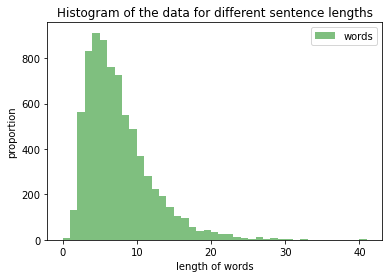

In [38]:
import matplotlib.pyplot as plt

# Plot the histogram
ax = plt.hist(get_document_size_train, bins=range(min(get_document_size_train), max(get_document_size_train) +1, 1),
              alpha=0.5, color="green")
labels = ['words']
plt.xlabel("length of words")
plt.ylabel("proportion")
plt.legend(labels)
plt.title("Histogram of the data for different sentence lengths")

Text(0.5, 1.0, 'Histogram of the data for different sentence lengths')

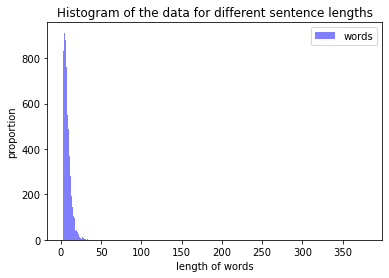

In [39]:
import matplotlib.pyplot as plt

# Plot the histogram
ax = plt.hist(get_document_size_train, bins=range(min(get_document_size_train_lemm), max(get_document_size_train_lemm) +1, 1),
              alpha=0.5, color="blue")
labels = ['words']
plt.xlabel("length of words")
plt.ylabel("proportion")
plt.legend(labels)
plt.title("Histogram of the data for different sentence lengths")

#### My observations

- Removing stopwords have reduced the total number of words count vastly
- Removing stop words have affected less in the total unique word count compared to the reduction in total number of words
- I have performed both lemmatizing and stemming on the dataset to compare the outputs. It is very visible that lemmatizing makes sense than stemming. Therefore, for the next steps in up coming developments, I have only used the lemmatized data.
- Lemmatizing the text has increased the size of document than when the dataset is after removing stopwords
- Two histograms have been plotted. One for the document size after removing stopwords and one after lemmatizing the text.


### Answer (c)

- In this section, bag-of-words, TF-IDF representations, a class to build and get confusion matrices for supervised learning algorithms are developed
- Neccessary libraries have been imported in order to perform the tasks

In [40]:
#creating bad of words

wordfreq = {}
index_no = 0
tokens = df_train['text']
stop_words = set(stopwords.words('english'))

for sentence in tokens:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [41]:
print(wordfreq)

{'This': 152, 'hotel': 1140, 'was': 2197, 'very': 691, 'modern': 49, 'and': 3550, 'sleek': 3, 'Beautiful': 10, 'welllaid': 1, 'out': 248, 'albeiit': 1, 'small': 182, 'rooms': 279, 'Fantastic': 11, 'breakfast': 209, 'with': 764, 'an': 259, 'incredible': 6, 'selection': 22, 'of': 1608, 'meats': 5, 'cheeses': 2, 'yogurts': 1, 'breads': 3, 'etc': 58, 'And': 32, 'as': 427, 'a': 2966, 'nonGerman': 1, 'speaker': 4, 'the': 5915, 'staff': 362, 'were': 875, 'uberhelpful': 1, 'Great': 69, 'location': 264, 'in': 1639, 'front': 149, 'ubahn': 1, 'stop': 29, 'Our': 78, 'first': 116, 'trip': 78, 'to': 2647, 'Berlin': 101, 'so': 321, 'we': 969, 'unfamiliar': 1, 'city': 86, 'layout': 6, 'But': 51, 'drawn': 3, 'design': 14, 'Artotel': 3, 'Yes': 12, 'public': 25, 'spaces': 4, 'are': 574, 'nicely': 16, 'designed': 4, 'not': 732, 'functional': 5, 'is': 1345, 'definitely': 55, 'way': 76, 'although': 31, 'there': 432, 'Ubahn': 3, 'station': 52, 'just': 240, 'half': 19, 'block': 31, 'away': 105, 'really': 158,

In [42]:
#Getting the most frequent 200 words
import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)
print(most_freq)

['the', 'and', 'a', 'to', 'was', 'in', 'of', 'I', 'The', 'is', 'for', 'hotel', 'room', 'we', 'at', 'were', 'it', 'you', 'on', 'with', 'but', 'that', 'not', 'very', 'We', 'had', 'this', 'are', 'have', 'from', 'our', 'be', 'there', 'as', 'all', 'they', 'stay', 'staff', 'my', 'good', 'great', 'would', 'so', 'one', 'which', 'rooms', 'no', 'or', 'about', 'location', 'an', 'only', 'us', 'nice', 'out', 'if', 'just', 'night', 'It', 'get', 'time', 'up', 'stayed', 'service', 'breakfast', 'clean', 'will', 'did', 'some', 'me', 'day', 'small', 'by', 'your', 'desk', 'also', 'when', 'could', 'bed', 'other', 'two', 'like', 'really', 'floor', 'more', 'go', 'This', 'here', 'front', 'well', 'can', 'There', 'place', 'been', 'again', 'do', 'food', 'its', 'than', 'bathroom', 'Hotel', 'got', 'area', 'helpful', 'has', 'They', 'their', 'If', 'back', 'walk', 'any', 'friendly', 'what', 'after', 'My', 'even', 'bar', 'nights', 'first', 'because', 'down', 'restaurant', 'lobby', 'water', 'people', 'much', 'didnt', '

In [43]:
most_freq_str = " ".join(most_freq)

In [44]:
print(most_freq_str)

the and a to was in of I The is for hotel room we at were it you on with but that not very We had this are have from our be there as all they stay staff my good great would so one which rooms no or about location an only us nice out if just night It get time up stayed service breakfast clean will did some me day small by your desk also when could bed other two like really floor more go This here front well can There place been again do food its than bathroom Hotel got area helpful has They their If back walk any friendly what after My even bar nights first because down restaurant lobby water people much didnt little comfortable view hotels dont found around pool restaurants street best where away many Berlin price Seattle free beds right too bit them quite excellent booked before better recommend beach next over told most A made off take city though went minutes star resort asked into close who never shower When Our trip enough see said th way few another through then problem make nois

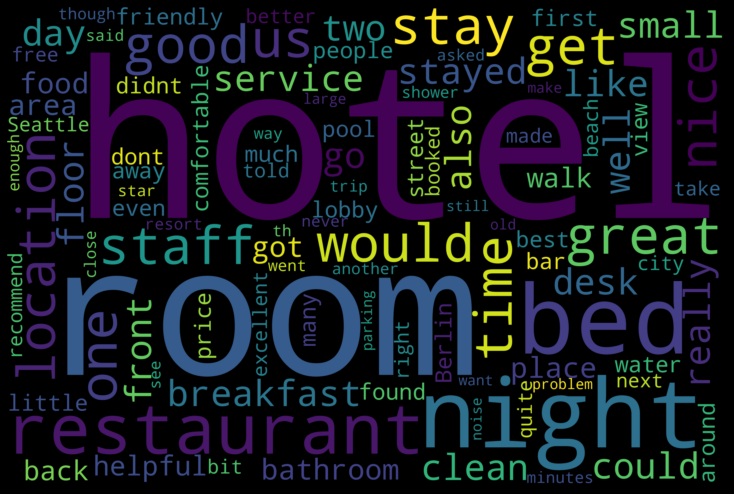

In [45]:
from wordcloud import WordCloud

stop_words = set(stopwords.words('english'))

wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = stop_words).generate(most_freq_str)

plt.figure(figsize = (10,10),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [46]:
sentence_vectors = []
for sentence in tokens:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [47]:
sentence_vectors = np.asarray(sentence_vectors)

In [48]:
print(sentence_vectors)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


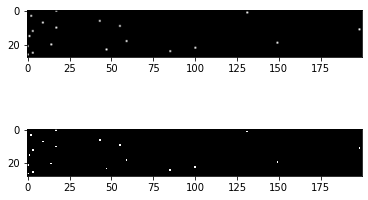

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


fig = plt.figure()
ax1 = fig.add_subplot(211)
# Bilinear interpolation - this will look blurry
ax1.imshow(sentence_vectors, interpolation='bilinear', cmap=cm.Greys_r)

ax2 = fig.add_subplot(212)
# 'nearest' interpolation - faithful but blocky
ax2.imshow(sentence_vectors, interpolation='nearest', cmap=cm.Greys_r)

plt.show()

In [50]:
from collections import Counter
from tqdm import tqdm
from scipy.sparse import csr_matrix
import math
import operator
from sklearn.preprocessing import normalize
import numpy as np

In [51]:
#Splitting dataset for validation purpose
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train.drop(columns=['review_num','label']), 
                                                    df_train['label'], 
                                                    test_size=.2, 
                                                    random_state=42)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6027, 5)
(1507, 5)
(6027,)
(1507,)


In [53]:
y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_train_df.head()
y_train_df.shape

(6027, 1)

In [54]:
x_train.head()

text  \
5674              The service wasnt great but it was OK   
380   We had much better meals at the surrounding ca...   
3467  Our decision on this property was made based o...   
2273                           the beds are comfortable   
2098  Rooms do not appear to have any functioning he...   

                                        tokernized_text  \
5674     [the, service, wasnt, great, but, it, was, ok]   
380   [we, had, much, better, meals, at, the, surrou...   
3467  [our, decision, on, this, property, was, made,...   
2273                      [the, beds, are, comfortable]   
2098  [rooms, do, not, appear, to, have, any, functi...   

                                 without_stopwords_text  \
5674                        [service, wasnt, great, ok]   
380   [much, better, meal, surrounding, cafesrestaur...   
3467  [decision, property, made, based, information,...   
2273                                 [bed, comfortable]   
2098  [room, appear, functioning, heating, built, fa...   

                                           stemmed_text  \
5674               the servic wasnt great but it wa ok    
380   we had much better meal at the surround cafesr...   
3467  our decis on thi properti wa made base on the ...   
2273                               the bed are comfort    
2098  room do not appear to have ani function heat o...   

                                            lemmed_text  
5674             The service wasnt great but it be OK    
380   We have much good meals at the surround cafesr...  
3467  Our decision on this property be make base on ...  
2273                           the bed be comfortable    
2098  Rooms do not appear to have any function heat ...

In [55]:
#Implementing TF-IDF representation

from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                              tokenizer = tokenizer.tokenize, 
                              stop_words=stop_words, 
                              ngram_range=(1,5),
                              min_df = 0.01)
 
x_lemm_train_tfidf_sparse = tf_idf_vect.fit_transform(x_train['lemmed_text'])

x_lemm_test_tfidf_sparse = tf_idf_vect.transform(x_test['lemmed_text'])


x_lemm_train_tfidf = pd.DataFrame(x_lemm_train_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())

x_lemm_test_tfidf = pd.DataFrame(x_lemm_test_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())


x_lemm_train_tfidf.head(10)

also  another  area  around  arrive       ask  away      back  bad  bar  \
0   0.0      0.0   0.0     0.0     0.0  0.000000   0.0  0.000000  0.0  0.0   
1   0.0      0.0   0.0     0.0     0.0  0.000000   0.0  0.000000  0.0  0.0   
2   0.0      0.0   0.0     0.0     0.0  0.000000   0.0  0.000000  0.0  0.0   
3   0.0      0.0   0.0     0.0     0.0  0.000000   0.0  0.000000  0.0  0.0   
4   0.0      0.0   0.0     0.0     0.0  0.000000   0.0  0.000000  0.0  0.0   
5   0.0      0.0   0.0     0.0     0.0  0.000000   0.0  0.000000  0.0  0.0   
6   0.0      0.0   0.0     0.0     0.0  0.000000   0.0  0.000000  0.0  0.0   
7   0.0      0.0   0.0     0.0     0.0  0.000000   0.0  0.000000  0.0  0.0   
8   0.0      0.0   0.0     0.0     0.0  0.000000   0.0  0.419505  0.0  0.0   
9   0.0      0.0   0.0     0.0     0.0  0.416182   0.0  0.000000  0.0  0.0   

   ...   us  use  view  walk      want  water  way  well  work     would  
0  ...  0.0  0.0   0.0   0.0  0.000000    0.0  0.0   0.0   0.0  0.000000  
1  ...  0.0  0.0   0.0   0.0  0.000000    0.0  0.0   0.0   0.0  0.000000  
2  ...  0.0  0.0   0.0   0.0  0.000000    0.0  0.0   0.0   0.0  0.000000  
3  ...  0.0  0.0   0.0   0.0  0.000000    0.0  0.0   0.0   0.0  0.000000  
4  ...  0.0  0.0   0.0   0.0  0.000000    0.0  0.0   0.0   0.0  0.000000  
5  ...  0.0  0.0   0.0   0.0  0.000000    0.0  0.0   0.0   0.0  0.000000  
6  ...  0.0  0.0   0.0   0.0  0.000000    0.0  0.0   0.0   0.0  0.000000  
7  ...  0.0  0.0   0.0   0.0  0.000000    0.0  0.0   0.0   0.0  0.000000  
8  ...  0.0  0.0   0.0   0.0  0.432098    0.0  0.0   0.0   0.0  0.000000  
9  ...  0.0  0.0   0.0   0.0  0.000000    0.0  0.0   0.0   0.0  0.684204  

[10 rows x 127 columns]

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
import nltk
import gensim

C:\Users\Dilshani\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [57]:
#Creating a class to build supervised learning models for classification and get the confusion matrices

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from yellowbrick.model_selection import feature_importances
from sklearn.linear_model import LogisticRegression


class Classification():
    
    
    def __init__(self,model_type,x_train,x_val,y_train,y_val):

        self.model_type = model_type
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        self.scores_table = pd.DataFrame()
        self.feature_importances = pd.DataFrame()
        self.name = self
        
        if self.model_type == 'Logistic Regression':
            self.technique = LogisticRegression(fit_intercept=False)
        elif self.model_type == 'Random Forest':
            self.technique = RandomForestClassifier(n_estimators=20,n_jobs=-1,random_state=42)
        elif self.model_type == 'Naive Bayes':
            self.technique = GaussianNB()

            
# Score Function

    def scores(self,model,x_train,x_val,y_train,y_val):
        
        self.acc_train = self.best_model.score(x_train,y_train)
        self.acc_val = self.best_model.score(x_val,y_val)
        
        d = {'Model Name': [self.model_type],
             'Train Accuracy': [self.acc_train], 
             'Validation Accuracy': [self.acc_val],
             'Accuracy Difference':[self.acc_train-self.acc_val]}
        self.scores_table = pd.DataFrame(data=d)
        
        return self.scores_table


# Get Scores Function

    def get_scores(self,params,cv_type):
        
        
        classifier = self.technique
        fit_classifier = classifier.fit(self.x_train,self.y_train)
        opt_model = GridSearchCV(fit_classifier,
                                 params,
                                 cv=cv_type,
                                 scoring='accuracy',
                                 return_train_score=True,
                                 n_jobs=-1)
        self.opt_model = opt_model.fit(self.x_train,self.y_train) 
        self.best_model = opt_model.best_estimator_
        self.scores = Classification.scores(self,self.best_model,self.x_train,self.x_val,self.y_train,self.y_val)
        self.best_params = opt_model.best_params_
        display(self.scores_table)
        if params == {}:
            pass
        else:
            self.y_validated = self.best_model.predict(self.x_val)
            self.classification_report = pd.DataFrame.from_dict(classification_report(self.y_val,self.y_validated,output_dict=True)).iloc[0:3,0:5]
        return self.classification_report




# Confusion Matrix Function


    def conf_matrix(self):
        
        plt.figure(figsize=(4,4))
        ax = sns.heatmap(confusion_matrix(self.y_val, self.y_validated),
                         annot= True, 
                         fmt = '.4g', 
                         cbar=0,
                         xticklabels=[0,1],
                         yticklabels=[0,1])
        ax.set(xlabel='Predicted', ylabel='True')
        plt.show()



# Test Score Function


    def get_test_scores(self,X_test,y_test):
        
            
        self.y_test = y_test
        self.x_test = X_test
        self.scores_table = pd.DataFrame()
        self.test_scores = Classification.scores(self,self.best_model,self.x_train,self.x_test,self.y_train,self.y_test)
        display(self.scores_table)
        self.y_tested = self.best_model.predict(self.x_test)
        self.test_classification_report = pd.DataFrame.from_dict(classification_report(self.y_test,self.y_tested,output_dict=True)).iloc[0:3,0:5]
        
        return self.test_classification_report
    

# Show Test Confusion Matrix Function


    def test_conf_matrix(self):

        plt.figure(figsize=(4,4))
        ax = sns.heatmap(confusion_matrix(self.y_test, self.y_tested),
                         annot= True, 
                         fmt = '.4g', 
                         cbar=0,
                         xticklabels=[0,1],
                         yticklabels=[0,1])
        ax.set(xlabel='Predicted', ylabel='True')
        plt.show()

In [58]:
sns.set_context('poster')

In [59]:
print(x_train.shape)
print(y_train_df.shape)

(6027, 5)
(6027, 1)


In [60]:
print(len(x_lemm_train_tfidf))

6027


In [61]:
x_train, x_val, y_train, y_val = train_test_split(x_lemm_train_tfidf,y_train_df['label'],test_size=.25,random_state=42)

In [62]:
skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

Logistic Regression

In [63]:
#First Attempt

params = {'penalty':['l1','l2'],
          'C':[0.01,0.05,0.1,0.5,1,5,10]}

log_reg_1 = Classification('Logistic Regression',x_train,x_val,y_train,y_val)

log_reg_1.get_scores(params,skf)

C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.94424779        nan 0.94358407        nan 0.94380531
        nan 0.94115044        nan 0.94225664        nan 0.94269912
        nan 0.94225664]
  warnings.warn(
C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [       nan 0.94402655        nan 0.94391593        nan 0.94402655
        nan 0.94303097        nan 0.94330752        nan 0.94330752
        nan 0.9431969 ]
  warnings.warn(


Model Name  Train Accuracy  Validation Accuracy  \
0  Logistic Regression        0.944027             0.939615   

   Accuracy Difference  
0             0.004411

0         1  accuracy  macro avg  weighted avg
precision  0.939575  1.000000  0.939615   0.969788      0.943264
recall     1.000000  0.010870  0.939615   0.505435      0.939615
f1-score   0.968846  0.021505  0.939615   0.495176      0.911013

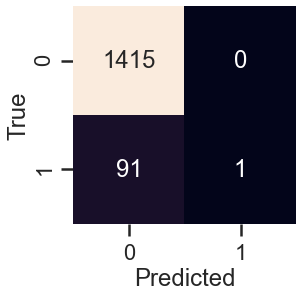

In [64]:
#Confusion matrix for LR
log_reg_1.conf_matrix()

In [65]:
#Second Attempt
params = {'penalty':['l1','l2'],
          'C':[0.05,0.1,0.5,1.0,1,5,10]}

log_reg_2 = Classification('Logistic Regression',x_train,x_val,y_train,y_val)

log_reg_2.get_scores(params,skf)

C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.94358407        nan 0.94380531        nan 0.94115044
        nan 0.94225664        nan 0.94225664        nan 0.94269912
        nan 0.94225664]
  warnings.warn(
C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [       nan 0.94391593        nan 0.94402655        nan 0.94303097
        nan 0.94330752        nan 0.94330752        nan 0.94330752
        nan 0.9431969 ]
  warnings.warn(


Model Name  Train Accuracy  Validation Accuracy  \
0  Logistic Regression        0.943584             0.936961   

   Accuracy Difference  
0             0.006623

0         1  accuracy  macro avg  weighted avg
precision  0.940000  0.285714  0.936961   0.612857      0.900057
recall     0.996466  0.021739  0.936961   0.509103      0.936961
f1-score   0.967410  0.040404  0.936961   0.503907      0.910818

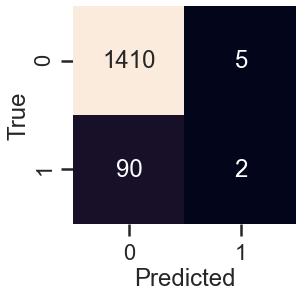

In [66]:
#Confusion matrix for LR - second attempt
log_reg_2.conf_matrix()

Random Forest

In [67]:
#First Attempt
params = {'min_samples_leaf':[3,5,10,15,30,50,100],
          'max_depth':[3,5,7,9,11,13,15]}

ran_for_1 = Classification('Random Forest',x_train,x_val,y_train,y_val)

ran_for_1.get_scores(params,skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0  Random Forest         0.94646             0.939615             0.006845

0         1  accuracy  macro avg  weighted avg
precision  0.940160  0.666667  0.939615   0.803413      0.923463
recall     0.999293  0.021739  0.939615   0.510516      0.939615
f1-score   0.968825  0.042105  0.939615   0.505465      0.912250

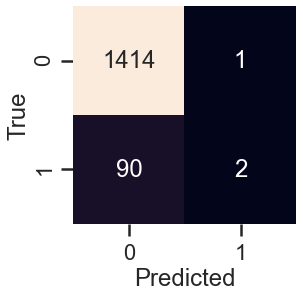

In [68]:
#Confusion matrix for Random Forest
ran_for_1.conf_matrix()

In [69]:
#Second Attempt
params = {'min_samples_leaf':[2,7,12,18,35,57,100],
          'max_depth':[3,5,9,9,15,17,19]}

ran_for_2 = Classification('Random Forest',x_train,x_val,y_train,y_val)

ran_for_2.get_scores(params,skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0  Random Forest         0.94469             0.938952             0.005739

C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0    1  accuracy  macro avg  weighted avg
precision  0.938952  0.0  0.938952   0.469476      0.881630
recall     1.000000  0.0  0.938952   0.500000      0.938952
f1-score   0.968515  0.0  0.938952   0.484257      0.909388

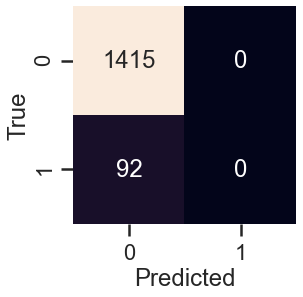

In [69]:
#Confusion matrix for Random Forest - second attempt
ran_for_2.conf_matrix()

Naive Bayes

In [70]:
#First Attempt
params = {'var_smoothing':[1e-09,1e-06,1e-03,1e-01,1e2]}

gnb_1 = Classification('Naive Bayes',x_train,x_val,y_train,y_val)

gnb_1.get_scores(params,skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0  Naive Bayes        0.944469             0.938952             0.005517

C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0    1  accuracy  macro avg  weighted avg
precision  0.938952  0.0  0.938952   0.469476      0.881630
recall     1.000000  0.0  0.938952   0.500000      0.938952
f1-score   0.968515  0.0  0.938952   0.484257      0.909388

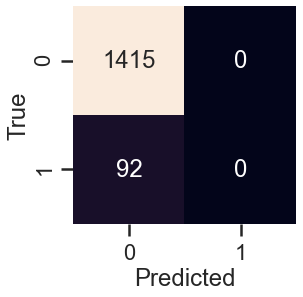

In [71]:
#Confusion matrix for Naive Bayes
gnb_1.conf_matrix()

In [72]:
#Second Attempt
params = {'var_smoothing':[1e-06,1e-06,1e-01,1e2,1e3]}

gnb_2 = Classification('Naive Bayes',x_train,x_val,y_train,y_val)

gnb_2.get_scores(params,skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0  Naive Bayes        0.944469             0.938952             0.005517

C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0    1  accuracy  macro avg  weighted avg
precision  0.938952  0.0  0.938952   0.469476      0.881630
recall     1.000000  0.0  0.938952   0.500000      0.938952
f1-score   0.968515  0.0  0.938952   0.484257      0.909388

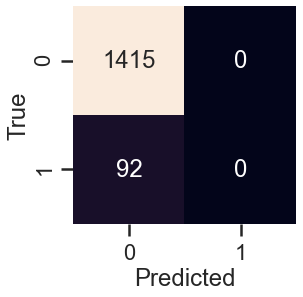

In [73]:
#Confusion matrix for Naive Bayes
gnb_2.conf_matrix()

##### Applying the models on test dataset

Logistic Regression

In [74]:
log_reg_1.get_test_scores(x_lemm_test_tfidf,y_test_df)

Model Name  Train Accuracy  Validation Accuracy  \
0  Logistic Regression        0.944027             0.930325   

   Accuracy Difference  
0             0.013701

0         1  accuracy  macro avg  weighted avg
precision  0.930897  0.500000  0.930325   0.715449      0.900874
recall     0.999287  0.009524  0.930325   0.504405      0.930325
f1-score   0.963880  0.018692  0.930325   0.491286      0.898024

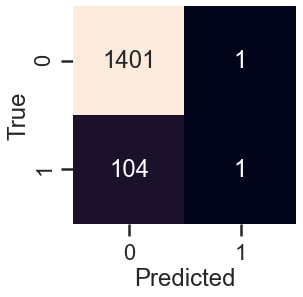

In [75]:
log_reg_1.test_conf_matrix()

Random Forest

In [76]:
ran_for_1.get_test_scores(x_lemm_test_tfidf,y_test_df)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0  Random Forest         0.94646             0.930989             0.015471

0         1  accuracy  macro avg  weighted avg
precision  0.930943  1.000000  0.930989   0.965471      0.935754
recall     1.000000  0.009524  0.930989   0.504762      0.930989
f1-score   0.964237  0.018868  0.930989   0.491552      0.898368

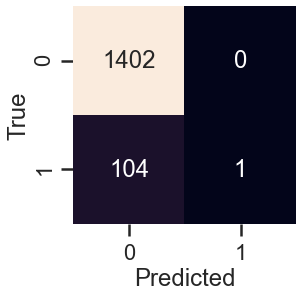

In [77]:
ran_for_1.test_conf_matrix()

Naive Bayes

In [78]:
gnb_1.get_test_scores(x_lemm_test_tfidf,y_test_df)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0  Naive Bayes        0.944469             0.930325             0.014144

C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dilshani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0    1  accuracy  macro avg  weighted avg
precision  0.930325  0.0  0.930325   0.465163      0.865505
recall     1.000000  0.0  0.930325   0.500000      0.930325
f1-score   0.963905  0.0  0.930325   0.481953      0.896745

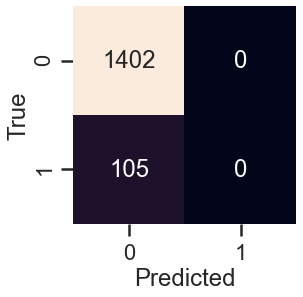

In [79]:
gnb_1.test_conf_matrix()

#### My observations

- The very first step was to creat BoW. Set of words with the count of the particular words in the dataset is listed in an array. In next step, the most frequently used 200 words are chosen from it.I generated a WordCloud image for the most frequent words of BoW. 

- TF-IDF representation is created next. I have splited my training dataset into training and testing to perform TF-IDF vectorization. TF mean term frequency of a word in a document and IDF is inverse document frequency of the word across a set of documents. This representation is built by multiplying two different metrics of term frequency and inverse document frequency. This representation shows how relevant a word is to a document in a collection of documents. 


- Classification class is built to perform classifcation algorithms such as Logistic Regression, Random Forest, and Naive Bayes.
    - Classification class includes 6 functions:
        - __init__ function which is the initializer
        - scores to get the accuracies
        - get_scores to get the matrices of precision, recall and f1-score
        - conf_matrix to get the confusion matrix graph
        - get_test_score to get accuracies when running on the test dataset
        - test_conf_matrix to get the confusion matrix graph on test dataset
- I have divided the training set of data from the previously splited dataset into train and validation.
- Then I ran the models on the testing set of data from the previously splited dataset to check the confusion matrices.

_Parameters used in the classification class are as below._

   - model: 'Logistic Regression', 'Random Forest', 'Naive Bayes'; the type of classifcation applied
   - x_train: is a dataframe which is the independant variables of the training data
   - x_val: is a dataframe which is the independant variables of the validation data
   - y_train: is a series which is the target variable of the training data
   - y_val: is a series which the target variable of the validation data
   
- To get the accuraccy matrices, a score table is displayed. Score table is a dataframe which concludes,   
    - the model used
    - train accuracy 
    - validation accuracy
    
    - preciion, recall and f1-score are displayed with accuracy, macro average and weighted average
         - Precision is about how precise/accurate your model is out of those predicted positive, how many of them are actual positive.
         - Recall is calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive)
         - f1 score might be a better measure to use if we need to seek a balance between Precision and Recall and there is an uneven class distribution (large number of Actual Negatives).


- I have used Decision tree, Logistic Regression, Random forest and Naive Bayes to train and test the datasets.
- I built two models for each technique and trained it with the same dataset. 
- I have drawn confusion matric graph for each model in both training and testing phases
- Decisions that can be taken by looking at the confusion matrices built are as below
    - The accuracy differences of the selected suprvised models which ran on both training and testing sets of data helps to assume that Logistic Regression achieved the least difference in accuracy of training and validating.
    - It is very visible that even for the testing dataset, Logistic Regression has acheived the least accuracy difference
    
- Accoding to the observations, I decided that Logistic Regression has been a better model among these three types of supervised learning models to classify posts as suggestions and non-suggestions
    

### Answer (d)

In this section, Logistic regression classifier has been improved with the Ensemble machine learning algorithms to improve predictivity. XGBoost, AdaBoost, Voting and Stacking are the algorithms used in here.

In [80]:
import pandas as pd
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost.sklearn import XGBClassifier

# Ensemble Models Class


class Ensemble(Classification):
    
    
    def __init__(self, ensemble_method, estimators, X_train, X_val, y_train, y_val):
        
        self.ensemble_method = ensemble_method
        self.x_train = X_train
        self.y_train = y_train
        self.x_val = X_val
        self.y_val = y_val
        self.model_type = ensemble_method
        self.scores_table = pd.DataFrame()
        
        if self.ensemble_method == "Voting":
            self.technique = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
        elif self.ensemble_method == "AdaBoost":
            self.technique = AdaBoostClassifier(estimators, algorithm='SAMME')
        elif self.ensemble_method == "XGBoost":
            self.technique = XGBClassifier(n_jobs=-1)
        elif self.ensemble_method == "Stacking":
            self.technique = StackingClassifier(estimators)

In [81]:
params = {'eta':[0.001,0.005,0.1,0.5],
          'min_child_weight':[1,5,10]}

xgboost_1 = Ensemble('XGBoost',log_reg_1.best_model,x_train,x_val,y_train,y_val)

xgboost_1.get_scores(params,skf)

C:\Users\Dilshani\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dilshani\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0    XGBoost        0.953982             0.936297             0.017685

0         1  accuracy  macro avg  weighted avg
precision  0.944707  0.416667  0.936297   0.680687      0.912471
recall     0.990106  0.108696  0.936297   0.549401      0.936297
f1-score   0.966874  0.172414  0.936297   0.569644      0.918373

In [82]:
params = {'learning_rate':[0.1,1,10]}


adaboost_1 = Ensemble('AdaBoost',log_reg_1.best_model,x_train,x_val,y_train,y_val)

adaboost_1.get_scores(params,skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0   AdaBoost        0.944027             0.938288             0.005739

0         1  accuracy  macro avg  weighted avg
precision  0.939495  0.333333  0.938288   0.636414      0.902489
recall     0.998587  0.010870  0.938288   0.504728      0.938288
f1-score   0.968140  0.021053  0.938288   0.494596      0.910322

In [84]:
params = {'voting':['hard','soft']}


adaboost_best = ('ada', adaboost_1.best_model)
log_reg_best = ('lr2', log_reg_1.best_model)

estimators = [adaboost_best,log_reg_best]

voting = Ensemble('Voting',estimators,x_train,x_val,y_train,y_val)

In [85]:
voting.get_scores(params,skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0     Voting        0.944027             0.939615             0.004411

0         1  accuracy  macro avg  weighted avg
precision  0.939575  1.000000  0.939615   0.969788      0.943264
recall     1.000000  0.010870  0.939615   0.505435      0.939615
f1-score   0.968846  0.021505  0.939615   0.495176      0.911013

In [86]:
adaboost_best = ('ada', adaboost_1.best_model)
log_reg_best = ('lr2', log_reg_1.best_model)

estimators = [adaboost_best,log_reg_best]

stacking = Ensemble('Stacking',estimators,x_train,x_val,y_train,y_val)

stacking.get_scores({},skf)

Model Name  Train Accuracy  Validation Accuracy  Accuracy Difference
0   Stacking        0.944469             0.938952             0.005517

AttributeError: 'Ensemble' object has no attribute 'classification_report'

In [87]:
all_models = pd.concat([ran_for_1.scores_table,
                        log_reg_1.scores_table,
                        gnb_1.scores_table,
                        adaboost_1.scores_table,
                        xgboost_1.scores_table,
                        voting.scores_table,
                        stacking.scores_table],
                        axis=0)

all_models

Model Name  Train Accuracy  Validation Accuracy  \
0        Random Forest        0.946460             0.930989   
0  Logistic Regression        0.944027             0.930325   
0          Naive Bayes        0.944469             0.930325   
0             AdaBoost        0.944027             0.938288   
0              XGBoost        0.953982             0.936297   
0               Voting        0.944027             0.939615   
0             Stacking        0.944469             0.938952   

   Accuracy Difference  
0             0.015471  
0             0.013701  
0             0.014144  
0             0.005739  
0             0.017685  
0             0.004411  
0             0.005517

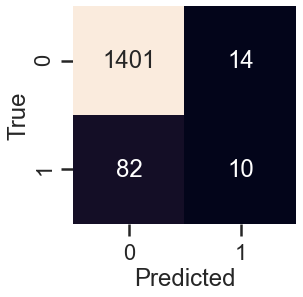

In [88]:
xgboost_1.conf_matrix()

#### My observations

- I have used the Ensemble Machine Leaning algorithms on the logistic regression model I built in previous question as I came into decision that logistic regression gave the best accuracies out of the models I built in question C
- Ensemble machine learning algorithms to imrpove the predictivity of the models.
- Ensemble learning is a general meta approach to machine learning that seeks better predictive performance by combining the predictions from multiple models.
- Adaboost, XGBoost, Voting and sracking are the Ensemble algorithms I have used here.
- Stacking involves fitting many different models types on the same data and using another model to learn how to best combine the predictions.
- Boosting involves adding ensemble members sequentially that correct the predictions made by prior models and outputs a weighted average of the predictions.
- After using them and compared all the models with their accuracies, I can see that AdaBoost and Voting has not changes the accuracy of Logistic Regression model I built.
- XGBoost has increased the accuracy on the Logistic Regression model.

### Answer (e)

- First of all, I removed the non suggestions posts from the dataframe.
- K-means is an unsupervised approach that can be used to categorize the suggestions into the different aspects	of the service offered.
- Mini Batch K-means have been used in this question.
- SSE for elbow method has been used to check the optimal count for k.

In [89]:
#Removing non suggestions posts
suggestions = df_train[df_train['label']==1]
suggestions.head()

review_num  \
13  berlin-hotel-190599-review-2   
17  berlin-hotel-190599-review-3   
35  berlin-hotel-190599-review-4   
41  berlin-hotel-190599-review-4   
71  berlin-hotel-191437-review-1   

                                                 text  label  \
13  If you do end up here be sure to specify a roo...      1   
17  and I was woken by the early morning firing up...      1   
35  As a general tip if you need to use the intern...      1   
41  If you expect no more than that you wont be di...      1   
71  Room was big bath was lovely but watch out for...      1   

                                      tokernized_text  \
13  [if, you, do, end, up, here, be, sure, to, spe...   
17  [and, i, was, woken, by, the, early, morning, ...   
35  [as, a, general, tip, if, you, need, to, use, ...   
41  [if, you, expect, no, more, than, that, you, w...   
71  [room, was, big, bath, was, lovely, but, watch...   

                               without_stopwords_text  \
13            [end, sure, specify, room, back, hotel]   
17  [woken, early, morning, firing, local, bus, se...   
35  [general, tip, need, use, internet, whilst, be...   
41                       [expect, wont, disappointed]   
71  [room, big, bath, lovely, watch, tile, floor, ...   

                                         stemmed_text  \
13  if you do end up here be sure to specifi a roo...   
17  and i wa woken by the earli morn fire up of th...   
35  as a gener tip if you need to use the internet...   
41  if you expect no more than that you wont be di...   
71  room wa big bath wa love but watch out for the...   

                                          lemmed_text  
13  If you do end up here be sure to specify a roo...  
17  and I be wake by the early morning fire up of ...  
35  As a general tip if you need to use the intern...  
41  If you expect no more than that you wont be di...  
71  Room be big bath be lovely but watch out for t...

In [90]:
#Vectorization
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(suggestions['lemmed_text'])
text = tfidf.transform(suggestions['lemmed_text'])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


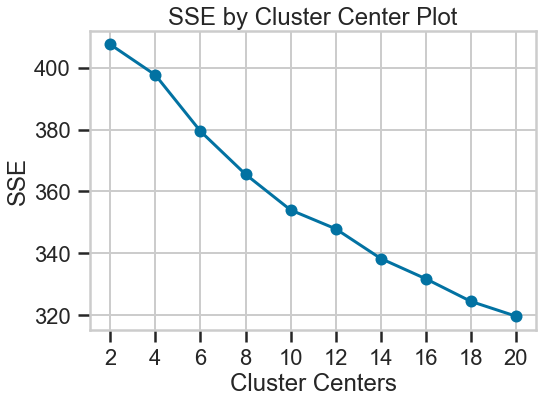

In [91]:
from sklearn.cluster import MiniBatchKMeans

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    #sum of squared error
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [92]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

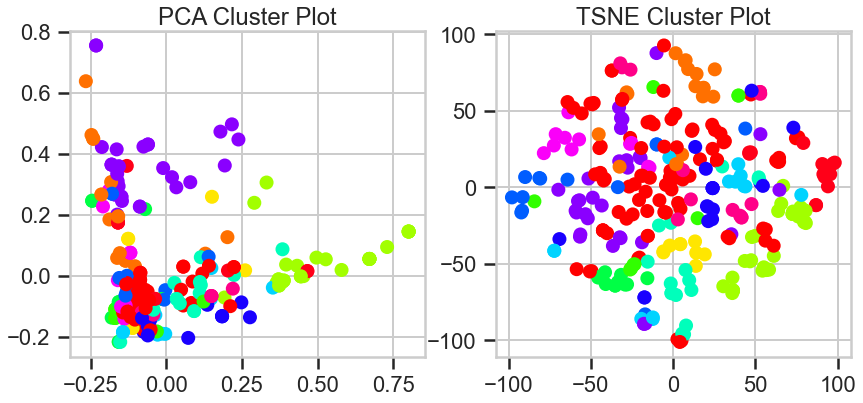

In [93]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [94]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
street,want,park,book,dont,just,tip,hotel,walk,staff

Cluster 1
clean,say,work,service,place,staff,reception,hotel,room,need

Cluster 2
beware,youre,like,pay,great,room,excellent,hotel,eat,breakfast

Cluster 3
like,visit,want,city,definitely,price,stay,highly,hotel,recommend

Cluster 4
eat,wont,website,expect,dont,car,money,good,service,star

Cluster 5
unless,low,excellent,stay,include,room,wont,view,dont,expect

Cluster 6
choice,careful,id,city,youre,place,hotel,want,dont,stay

Cluster 7
remember,want,dont,just,center,look,walk,bring,shop,place

Cluster 8
clean,like,room,beware,think,line,stay,internet,plan,use

Cluster 9
business,little,look,desk,want,choice,hotel,place,recommend,good

Cluster 10
big,right,stay,upgrade,face,hotel,small,floor,ask,room

Cluster 11
free,internet,moore,desk,room,dont,noise,tip,sure,make

Cluster 12
close,dinner,bar,hotel,area,good,youre,advise,restaurants,look

Cluster 13
tour,line,think,fine,bar,definitely,room,floor,hotel,avoid


In [95]:
from wordcloud import WordCloud,STOPWORDS
def get_top_string(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    str=''
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        str =','.join([labels[t] for t in np.argsort(r)[-n_terms:]])
        wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
        wc.generate(str)
        plt.imshow(wc)
        plt.axis('off')
        fig=plt.gcf()
        fig.set_size_inches(10,10)
        plt.show()


Cluster 0


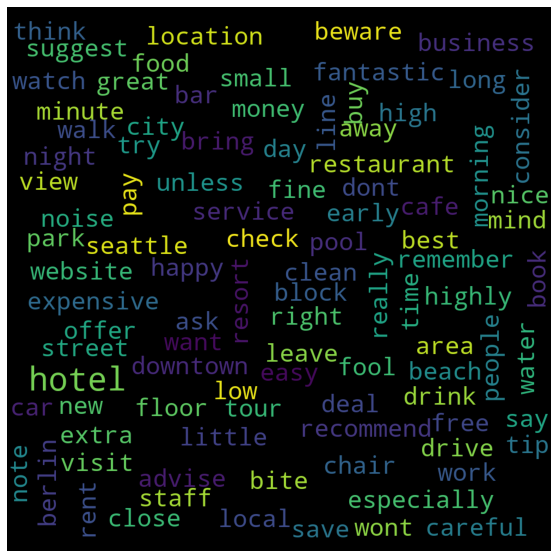


Cluster 1


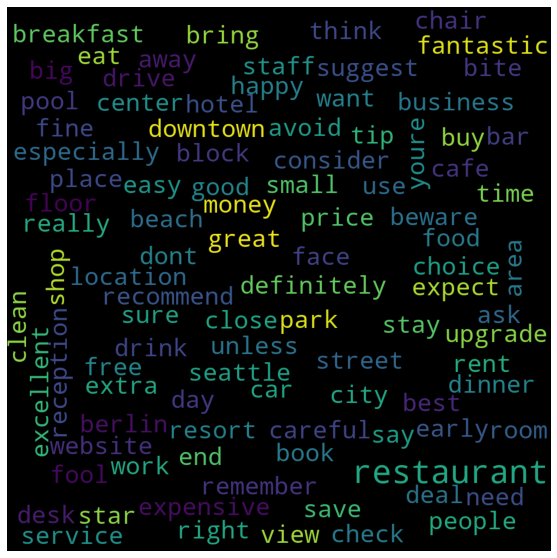


Cluster 2


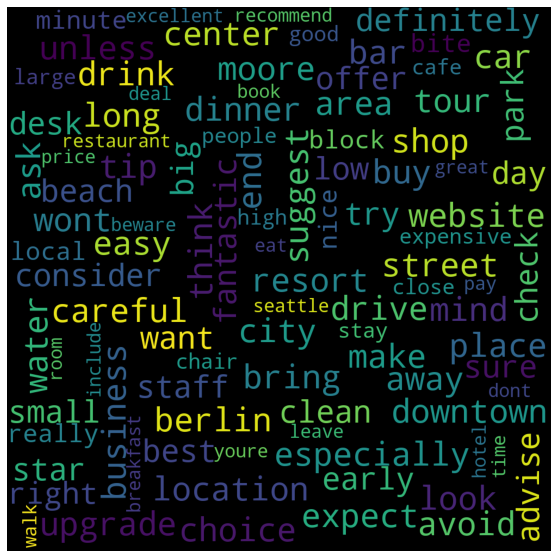


Cluster 3


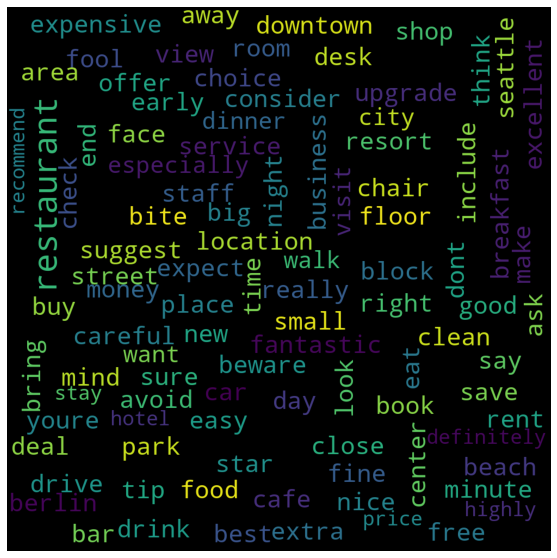


Cluster 4


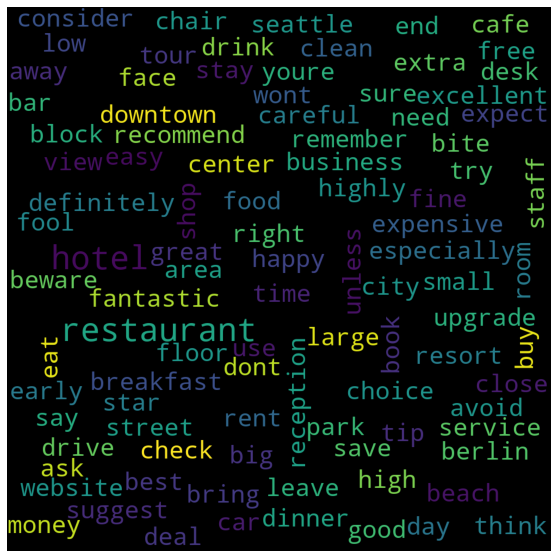


Cluster 5


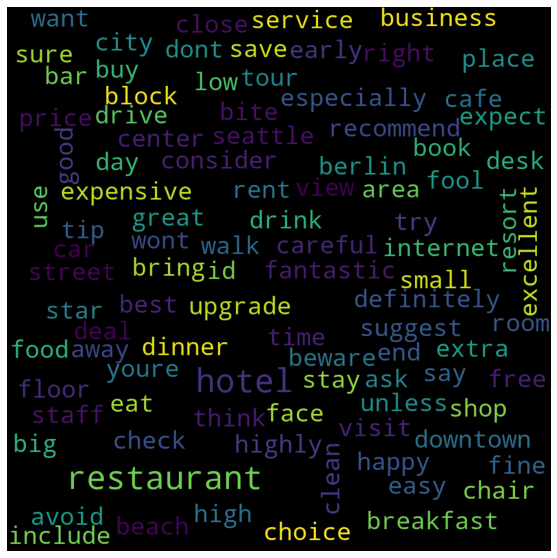


Cluster 6


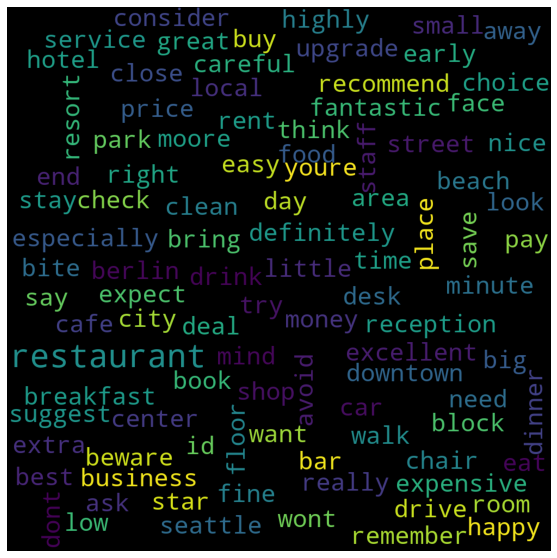


Cluster 7


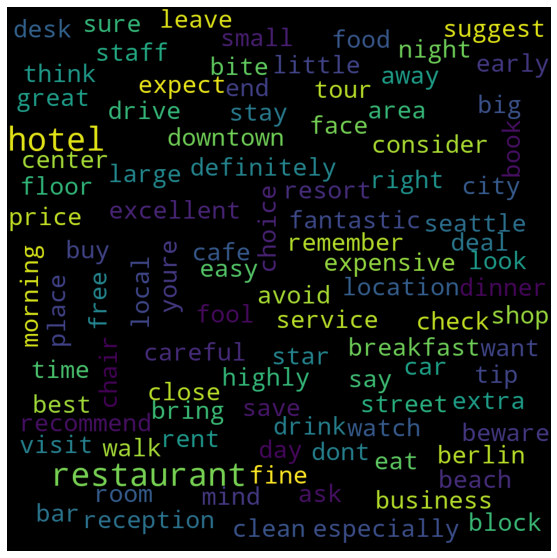


Cluster 8


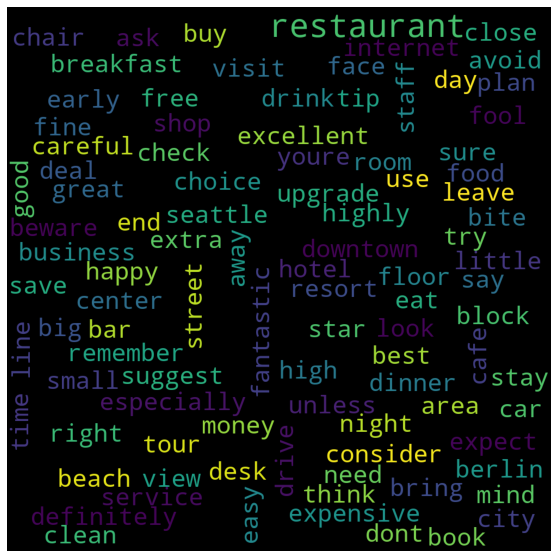


Cluster 9


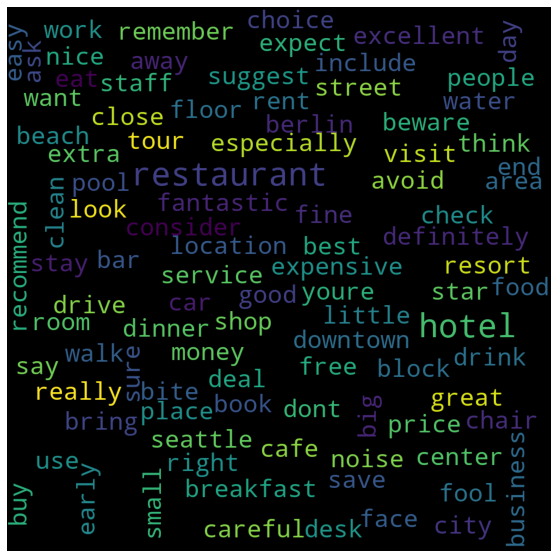


Cluster 10


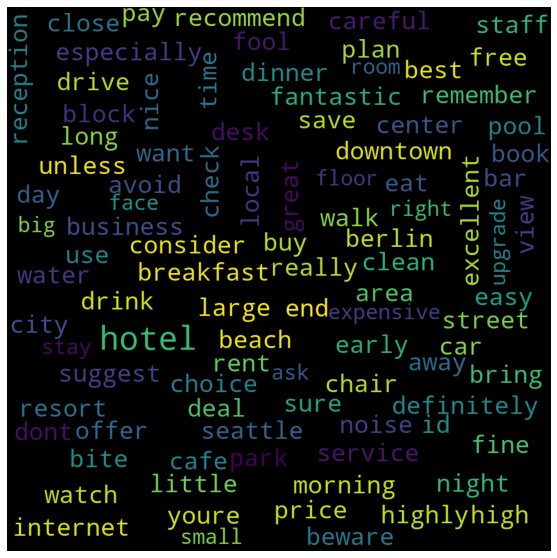


Cluster 11


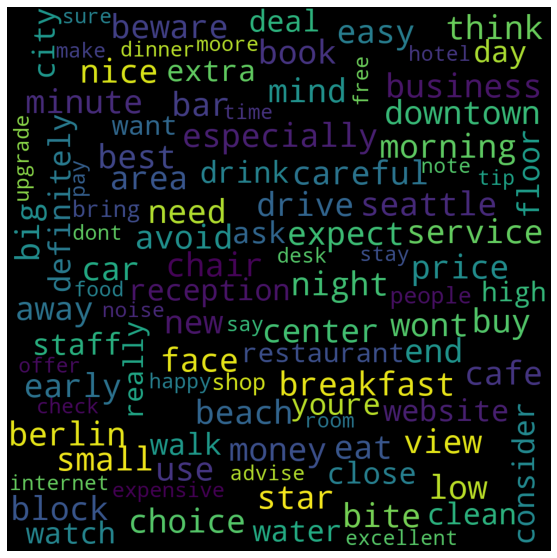


Cluster 12


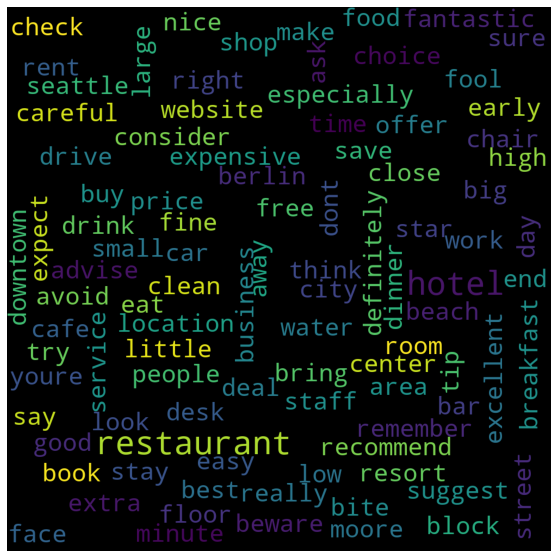


Cluster 13


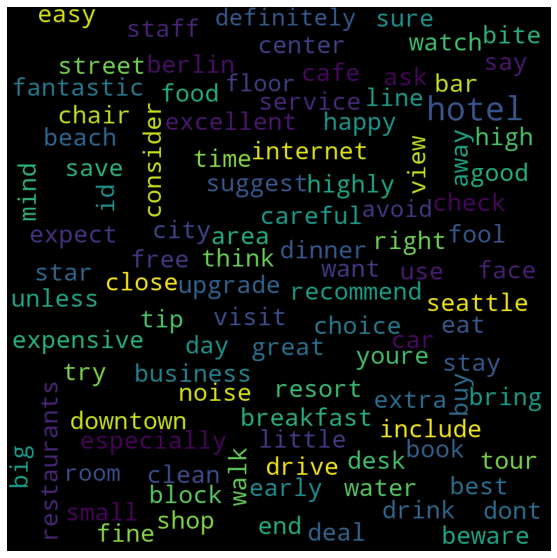

In [96]:
get_top_string(text, clusters, tfidf.get_feature_names(), 100)

#### My observations

- A cluster center is the representative of its cluster. The squared distance between each point and its cluster center is the required variation. The aim of k-means clustering is to find these k clusters and their centers while reducing the total error.

- I plotted the SSE for a range of cluster sizes. We look for the "elbow" where the SSE begins to level off. MiniBatchKMeans introduces some noise so I raised the batch and init sizes higher.

- One plot uses PCA which is better at capturing global structure of the data. The other uses TSNE which is better at capturing relations between neighbors. In order to speed up the process with TSNE, I sample from 3,000 documents and perform a PCA 50 dimension reduction on the data first. Next I show a scatterplot further sampling the sample down to 300 points.

- print out the top keywords based on their TFIDF score to see if we can spot any trends. I'll do this by computing an average value across all dimensions in Pandas, grouped by the cluster label. Using numpy, finding the top words is simply sorting the average values for each row, and taking the top N.

- staff, clean, restuarant, happy, highly, star, best, reccomend and etc. are in the top keywords 

### Answer (f)

- I have used the Within-Cluster-Sum of Squared Errors (WSS) in this question
- Silhouette Method was also used with same approach as in previous question

In [97]:
# vectorisation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")
suggestions['lemmed_text']=[" ".join(body) for body in suggestions['tokernized_text'].values]
text_data_features = vectorizer.fit_transform(suggestions['lemmed_text'])
text_data_features = text_data_features.toarray()
words = vectorizer.get_feature_names()
print(len(vectorizer.get_feature_names()))

1694


<ipython-input-97-3529b73c9c35>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suggestions['lemmed_text']=[" ".join(body) for body in suggestions['tokernized_text'].values]


In [98]:
# Using the Elbow Method

from sklearn.cluster import KMeans

def kmeansClustering(features, clusters):
  wcss = []
  for i in clusters:
      kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=9,random_state=0)
      kmeans.fit(features)
      kmeans_cluster_labels.append(kmeans.labels_)
      wcss.append(kmeans.inertia_)
  plt.plot(clusters,wcss)
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.savefig('elbow.png')
  plt.show()

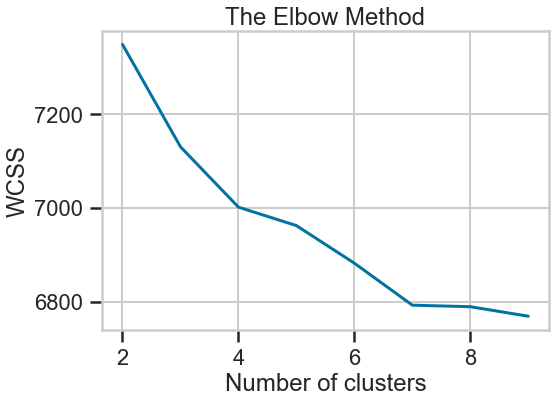

In [99]:
score = []
kmeans_cluster_labels = []
clusters_new= kmeansClustering(text_data_features,range(2,10))

In [100]:
# Using Silhouette Coefficient method
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouetteCoefficient(features):
  for i, k in enumerate([2, 3, 4, 5, 6, 7, 8, 9]):
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)
      X_std = features
      km = KMeans(n_clusters=k) # Run the Kmeans algorithm
      labels = km.fit_predict(X_std)
      centroids = km.cluster_centers_      
      silhouette_vals = silhouette_samples(X_std, labels) # Get silhouette samples

      # Silhouette plot
      y_ticks = []
      y_lower, y_upper = 0, 0
      for i, cluster in enumerate(np.unique(labels)):
          cluster_silhouette_vals = silhouette_vals[labels == cluster]
          cluster_silhouette_vals.sort()
          y_upper += len(cluster_silhouette_vals)
          ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
          ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
          y_lower += len(cluster_silhouette_vals)

      # Get the average silhouette score and plot it
      avg_score = np.mean(silhouette_vals)
      ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
      ax1.set_yticks([])
      ax1.set_xlim([-0.1, 1])
      ax1.set_xlabel('Silhouette coefficient values')
      ax1.set_ylabel('Cluster labels')
      ax1.set_title('Silhouette plot for the various clusters', y=1.02);
      plt.suptitle(f'Silhouette analysis using k = {k}',
                  fontsize=16, fontweight='semibold', y=1.05);

def silhouetteCoefficientScore(features, clusters):
    i = 0
    while i < len(kmeans_cluster_labels):
        s_score.append(silhouette_score(features, kmeans_cluster_labels[i]))
        i += 1
    print(f"maximum Score is: {max(s_score)}")

    #Plot the graph
    plt.plot(clusters, s_score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sillhoutte Score')
    plt.title('Sillhoutte Method')
    plt.show()

maximum Score is: 0.11755328432233318


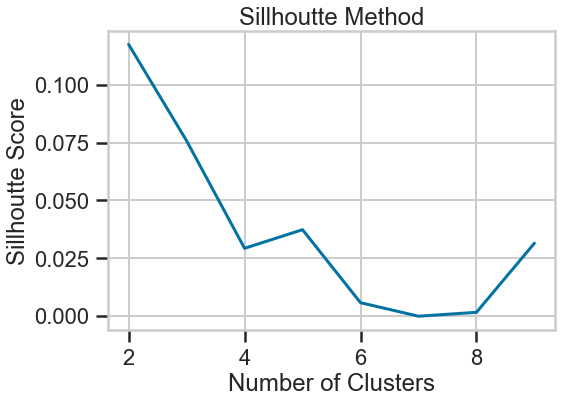

In [101]:
s_score = []
silhouetteCoefficientScore(text_data_features,range(2,10)) 

In [102]:
clusters1 = MiniBatchKMeans(n_clusters=8, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

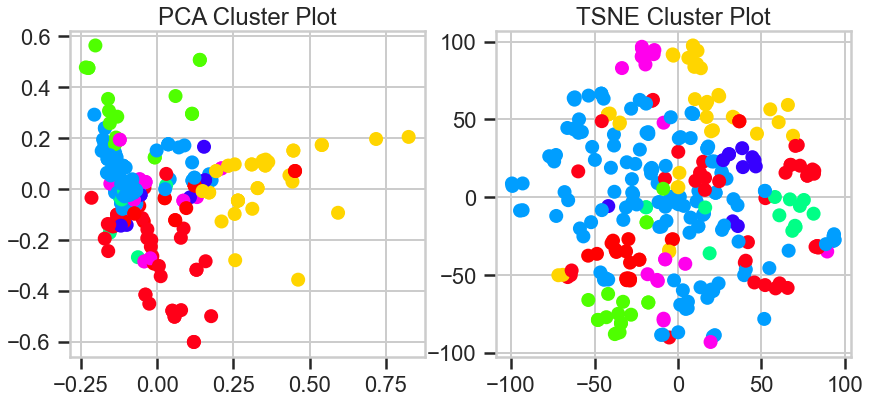

In [103]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters1)

In [106]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
    return df
            
get_top_keywords(text, clusters1, tfidf.get_feature_names(), 10)


Cluster 0
recommend,area,little,end,good,price,youre,hotel,place,look

Cluster 1
definitely,city,want,place,room,good,stay,highly,hotel,recommend

Cluster 2
staff,clean,work,desk,place,reception,service,room,hotel,need

Cluster 3
desk,hotel,dinner,offer,dont,noise,tip,room,sure,make

Cluster 4
ask,bring,street,floor,book,use,walk,just,hotel,room

Cluster 5
beware,chair,youre,like,pay,great,room,hotel,eat,breakfast

Cluster 6
noise,location,think,floor,use,bar,star,hotel,avoid,good

Cluster 7
plan,restaurant,leave,room,place,hotel,expect,want,dont,stay


0         1         2         3         4         5         6    \
0  0.016406  0.043379  0.014999  0.000000  0.015443  0.021955  0.016532   
1  0.000000  0.009638  0.000000  0.008953  0.016588  0.000000  0.008611   
2  0.000000  0.013961  0.000000  0.000000  0.010891  0.000000  0.000000   
3  0.025087  0.000000  0.032555  0.000000  0.000000  0.000000  0.000000   
4  0.018058  0.014353  0.025598  0.000000  0.017922  0.011115  0.016221   
5  0.019089  0.000000  0.000000  0.000000  0.000000  0.000000  0.033416   
6  0.013732  0.026516  0.016686  0.249453  0.000000  0.045900  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.012460  0.000000  0.000000   

        7         8         9    ...       125       126       127       128  \
0  0.035325  0.020859  0.000000  ...  0.000000  0.000000  0.000000  0.012641   
1  0.009027  0.000000  0.000000  ...  0.006136  0.024581  0.029134  0.037217   
2  0.000000  0.000000  0.000000  ...  0.016495  0.000000  0.000000  0.030809   
3  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.013918  0.017859   
4  0.010226  0.008818  0.022868  ...  0.019693  0.014422  0.033827  0.022873   
5  0.000000  0.015062  0.046748  ...  0.000000  0.000000  0.044819  0.031931   
6  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.008544  0.010185   
7  0.000000  0.016814  0.000000  ...  0.021376  0.000000  0.007541  0.098512   

        129       130       131       132       133       134  
0  0.000000  0.000000  0.000000  0.019113  0.000000  0.093779  
1  0.000000  0.011876  0.000000  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  0.000000  0.040676  0.000000  
3  0.014998  0.014268  0.000000  0.000000  0.000000  0.014657  
4  0.015960  0.013120  0.022229  0.010980  0.012908  0.000000  
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.057432  
6  0.000000  0.000000  0.000000  0.000000  0.015369  0.027711  
7  0.000000  0.007364  0.000000  0.011476  0.000000  0.020267  

[8 rows x 135 columns]

In [104]:
from wordcloud import WordCloud,STOPWORDS
def get_top_string(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    str=''
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        str =','.join([labels[t] for t in np.argsort(r)[-n_terms:]])
        wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
        wc.generate(str)
        plt.imshow(wc)
        plt.axis('off')
        fig=plt.gcf()
        fig.set_size_inches(10,10)
        plt.show()


Cluster 0


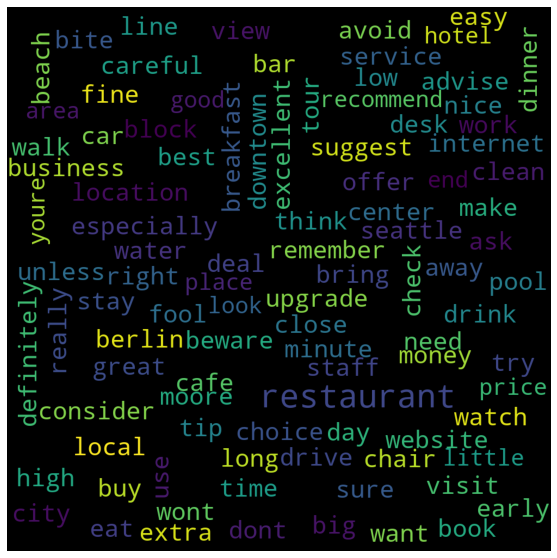


Cluster 1


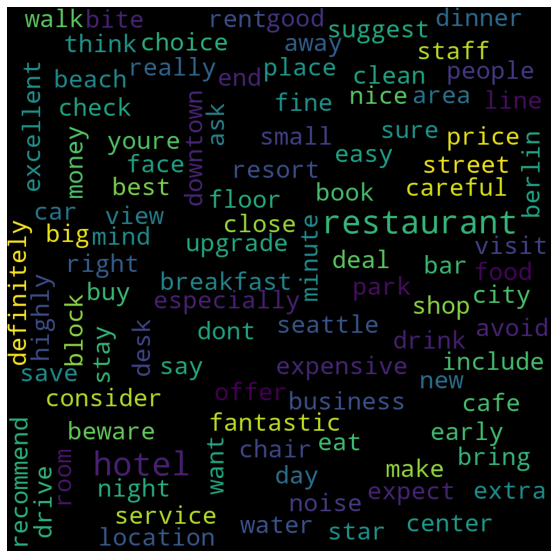


Cluster 2


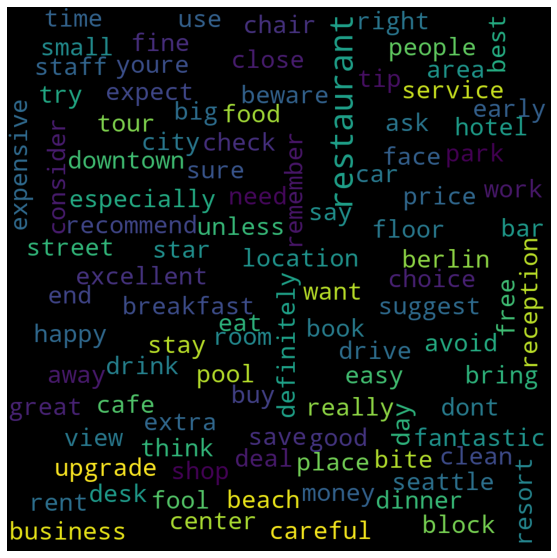


Cluster 3


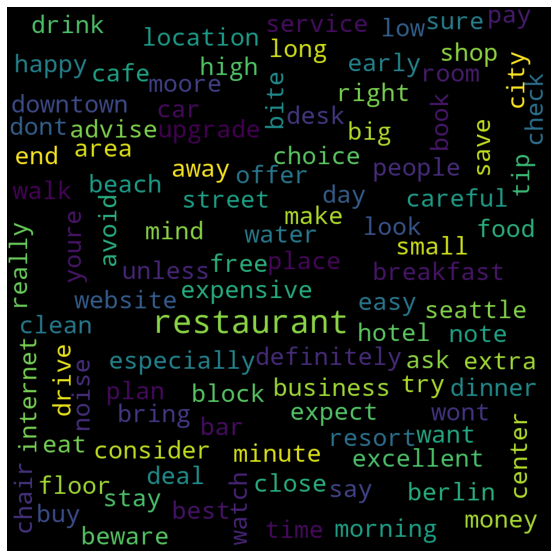


Cluster 4


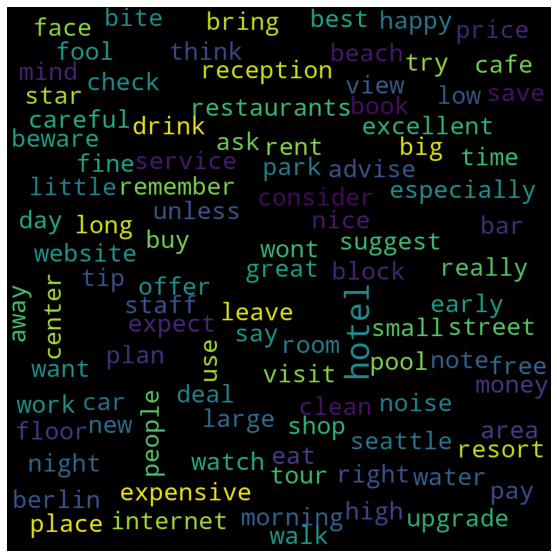


Cluster 5


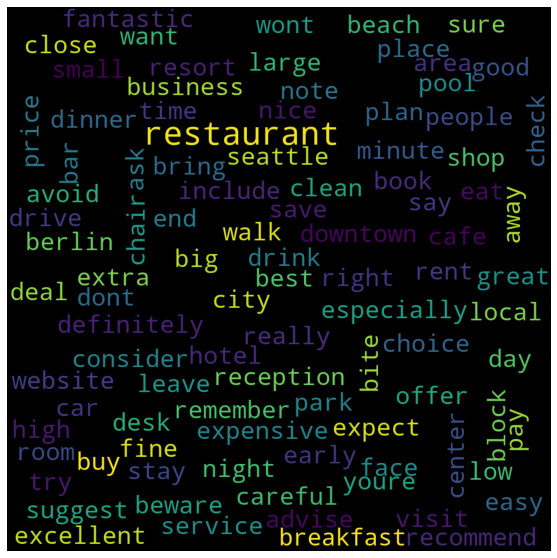


Cluster 6


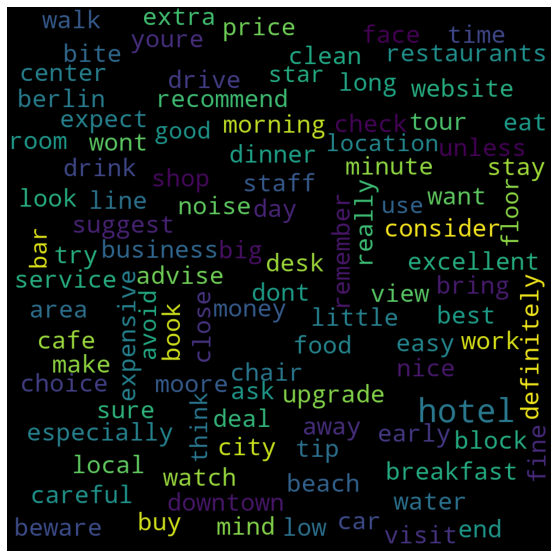


Cluster 7


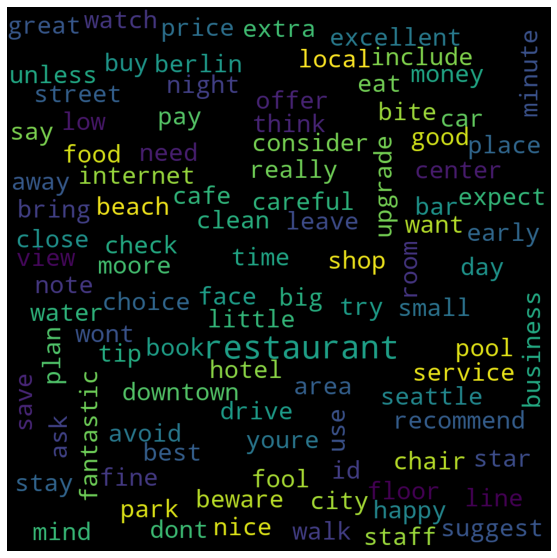

In [105]:
get_top_string(text, clusters1, tfidf.get_feature_names(), 100)

#### My observations

- Elbow method is determining the optimal number of clusters.
- The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).
- Value, location, service, food, facility,	room, quality and staff are the aspects needed to align with the clusters and I can see that these apects are visible in the above clusters